# Overfitting


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn import  metrics
from sklearn.model_selection import train_test_split

In [2]:
import seaborn as sns

## Generowanie danych

In [3]:
plt.style.use('seaborn-white')

In [4]:
np.random.seed(0)
n_samples = 30
true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

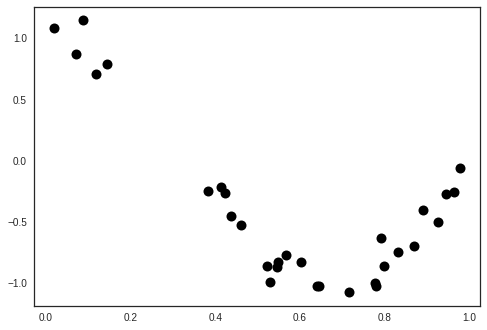

In [5]:
plt.plot(X, y, 'ok', ms=10);
plt.show()

## Podział na dane treningowe i testowe

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(21,) (21,)
(9,) (9,)


In [7]:
X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

## Dopasowanie do danych treningowych modelu stopnia 2 i 12

In [33]:
model2 = make_pipeline(PolynomialFeatures(2), lm.LinearRegression())
model2.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [34]:
print("Explained variance score: {}".format( metrics.explained_variance_score(y_train, model2.predict(X_train)) ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y_train, model2.predict(X_train)) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(y_train, model2.predict(X_train)) ))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_train, model2.predict(X_train)) ))
print("R2: {}".format(metrics.r2_score(y_train, model2.predict(X_train)) ))

Explained variance score: 0.9254551703653705
Median absolute error: 0.14750712571821994
Mean squared error: 0.03258652306515121
Mean absolute errors: 0.1563484583239655
R2: 0.9254551703653706


In [35]:
model12 = make_pipeline(PolynomialFeatures(12), lm.LinearRegression())
model12.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=12, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [36]:
print("Explained variance score: {}".format( metrics.explained_variance_score(y_train, model12.predict(X_train)) ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y_train, model12.predict(X_train)) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(y_train, model12.predict(X_train)) ))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_train, model12.predict(X_train)) ))
print("R2: {}".format(metrics.r2_score(y_train, model12.predict(X_train)) ))

Explained variance score: 0.9889975843667222
Median absolute error: 0.04342225888177054
Mean squared error: 0.004809595414778885
Mean absolute errors: 0.04687077183675557
R2: 0.9889975843667222


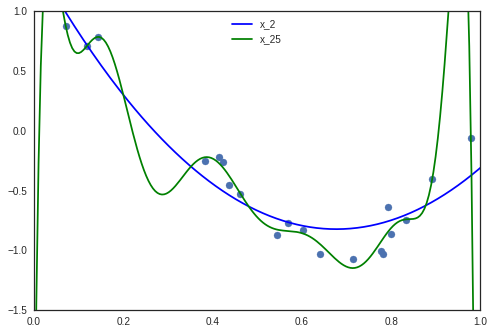

In [37]:
X_tr = np.linspace(0,1,200)
plt.scatter(X_train,y_train)
plt.plot(X_tr,model2.predict(X_tr[:,np.newaxis]),"b-",label="x_2")
plt.plot(X_tr,model12.predict(X_tr[:,np.newaxis]),"g-",label="x_25")
plt.xlim([0,1])
plt.ylim([-1.5,1])
plt.legend()
plt.show()

## Sprawdzenie dopasowania modeli do danych testowych

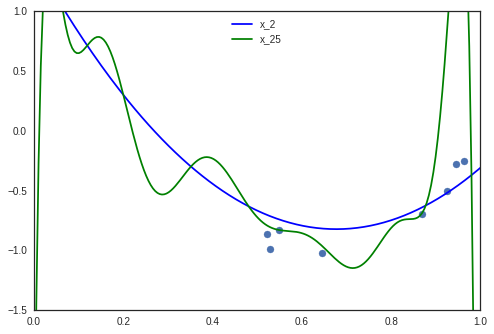

In [38]:
X_tr = np.linspace(0,1,200)
plt.scatter(X_test,y_test)
plt.plot(X_tr,model2.predict(X_tr[:,np.newaxis]),"b-",label="x_2")
plt.plot(X_tr,model12.predict(X_tr[:,np.newaxis]),"g-",label="x_25")
plt.xlim([0,1])
plt.ylim([-1.5,1])
plt.legend()
plt.show()

In [39]:
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model2.predict(X_test)) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model2.predict(X_test)) ))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model2.predict(X_test)) ))
print("R2: {}".format(metrics.r2_score(y_test, model2.predict(X_test)) ))

Explained variance score: 0.9224217025708447
Median absolute error: 0.16096325379192872
Mean squared error: 0.03145588085665148
Mean absolute errors: 0.1569314408847686
R2: 0.9215921264873862


In [40]:
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model12.predict(X_test)) ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model12.predict(X_test)) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model12.predict(X_test)) ))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model12.predict(X_test)) ))
print("R2: {}".format(metrics.r2_score(y_test, model12.predict(X_test)) ))

Explained variance score: -1.1568063570442462
Median absolute error: 0.1853563102247633
Mean squared error: 1.2330476244474193
Mean absolute errors: 0.7102392127477777
R2: -2.073531547671113
